# Assignment 3: Building Time Series Forecasts

**Student Name:** Nash Gagliano

**Date:** 2/15/2026

---

## Assignment Overview

In this assignment, you'll analyze temporal data from Corporación Favorita stores to identify trends, seasonality, and anomalies, then build forecasting models using decomposition techniques. You'll work with real retail sales data to predict future sales patterns.

---

## Step 1: Download Data, Import Libraries, and Load Data

The datasets for this analysis are too large too be stored on GitHub. To access the datasets for this assignment, you should:
- Go to the [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) dataset on Kaggle.
- Click Data 
- Scroll down and select **Download All**.
- Open the zip file and upload `train.csv`, `store.csv`, and `holidays_events.csv` to the `data` directory.

Once the CSV files have been added to the `data` directory, install all the of the necessary libraries for this assignment by running the command below.

In [40]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


Next, import the required libraries.

In [41]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


Finally, load the training, store, and holiday CSV data from the `data` directory using `pd.read_csv()`. Display basic information about the training data and print out the first few rows to get an understanding of what the training data looks like.

In [42]:
# Load the datasets
# TODO: Load all three required CSV files
train_df = pd.read_csv('/Users/nashgagliano/Downloads/store-sales-time-series-forecasting/train.csv')
holidays_df = pd.read_csv('/Users/nashgagliano/Downloads/store-sales-time-series-forecasting/holidays_events.csv')
stores_df = pd.read_csv('/Users/nashgagliano/Downloads/store-sales-time-series-forecasting/stores.csv')

# Display basic information
if train_df is not None:
    print(f"Training data shape: {train_df.shape}")
    print(f"Date range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"\nFirst few rows:")
    # TODO: Display the first few rows

print("\n" + "="*80)
print("CHECKPOINT: Verify datasets loaded correctly")
print(f"Train data shape: {train_df.shape if train_df is not None else 'Not loaded'}")
print(f"Holidays data shape: {holidays_df.shape if holidays_df is not None else 'Not loaded'}")
print(f"Stores data shape: {stores_df.shape if stores_df is not None else 'Not loaded'}")
print("="*80)

Training data shape: (3000888, 6)
Date range: 2013-01-01 to 2017-08-15

First few rows:

CHECKPOINT: Verify datasets loaded correctly
Train data shape: (3000888, 6)
Holidays data shape: (350, 6)
Stores data shape: (54, 5)


### Explore Available Stores and Product Families
Display store information from `stores_df` to help choose a store. Consider looking at store type, cluster, and city

In [43]:
# Explore the data to help choose your store and products
if train_df is not None:
    print("Available stores:")
    print(f"Total number of stores: {train_df['store_nbr'].nunique()}")
    
    print("\nAvailable product families:")
    families = train_df['family'].value_counts().head(20)
    print(families)
    
    # TODO: Display store information from stores_df to help choose a store
    # Consider looking at store type, cluster, and city

Available stores:
Total number of stores: 54

Available product families:
family
AUTOMOTIVE             90936
BABY CARE              90936
BEAUTY                 90936
BEVERAGES              90936
BOOKS                  90936
BREAD/BAKERY           90936
CELEBRATION            90936
CLEANING               90936
DAIRY                  90936
DELI                   90936
EGGS                   90936
FROZEN FOODS           90936
GROCERY I              90936
GROCERY II             90936
HARDWARE               90936
HOME AND KITCHEN I     90936
HOME AND KITCHEN II    90936
HOME APPLIANCES        90936
HOME CARE              90936
LADIESWEAR             90936
Name: count, dtype: int64


---
## Step 2: Select and Prepare Your Time Series Data

### Select Your Store and Product Families

Choose one store and one product family (PRODUCE, BEVERAGES, BREAD/BAKERY, AUTOMOTIVE, etc.) to analyze.

In [44]:
# TODO: Select your store and product family
selected_store = 10  # Replace with your chosen store number (e.g., 1)
product_family_1 = 'AUTOMOTIVE'  # Replace with the product family you selected (e.g., 'PRODUCE')

print(f"Selected Store: {selected_store}")
print(f"Product Family 1: {product_family_1}")

Selected Store: 10
Product Family 1: AUTOMOTIVE


### Filter Data
Filter the `train_df` data to your selected store and products. Create a date range from 2016-01-01 to 2017-08-15 for consistency.

In [45]:
# TODO: Filter train_df for selected store and date range 2016-01-01 to 2017-08-15

# Convert date column to datetime if needed
if train_df is not None:
    train_df['date'] = pd.to_datetime(train_df['date'])

# Filter for date range
start_date = '2016-01-01'
end_date = '2017-08-15'

# TODO: Create filtered datasets for each product family
product1_data = None  # Filter for store, product_family_1, and date range

print("\n" + "="*80)
print("CHECKPOINT: Data filtered successfully")
print(f"Product data shape: {product1_data.shape if product1_data is not None else 'Not filtered'}")
print("="*80)


CHECKPOINT: Data filtered successfully
Product data shape: Not filtered


### Aggregate Daily Sales
Aggregate daily sales and handle missing dates.

In [46]:
# TODO: Group by date and sum sales for each product family
# TODO: Create a complete date range and fill missing dates with 0 sales

# Example structure (replace with your implementation):
# date_range = pd.date_range(start=start_date, end=end_date, freq='D')
# product1_ts = product1_data.groupby('date')['sales'].sum().reindex(date_range, fill_value=0)

train_df['date'] = pd.to_datetime(train_df['date'])
product1_data = train_df[train_df['family'] == 'AUTOMOTIVE']
product1_daily = product1_data.groupby('date')['sales'].sum()
date_range = pd.date_range(
    start=product1_daily.index.min(),
    end=product1_daily.index.max(),
    freq='D'
)
product1_ts = product1_daily.reindex(date_range, fill_value=0)
print(product1_ts.head())

2013-01-01      0.0
2013-01-02    255.0
2013-01-03    161.0
2013-01-04    169.0
2013-01-05    342.0
Freq: D, Name: sales, dtype: float64


### Plot Raw Time Series
Plot time series to see the raw patterns using matplotlib.

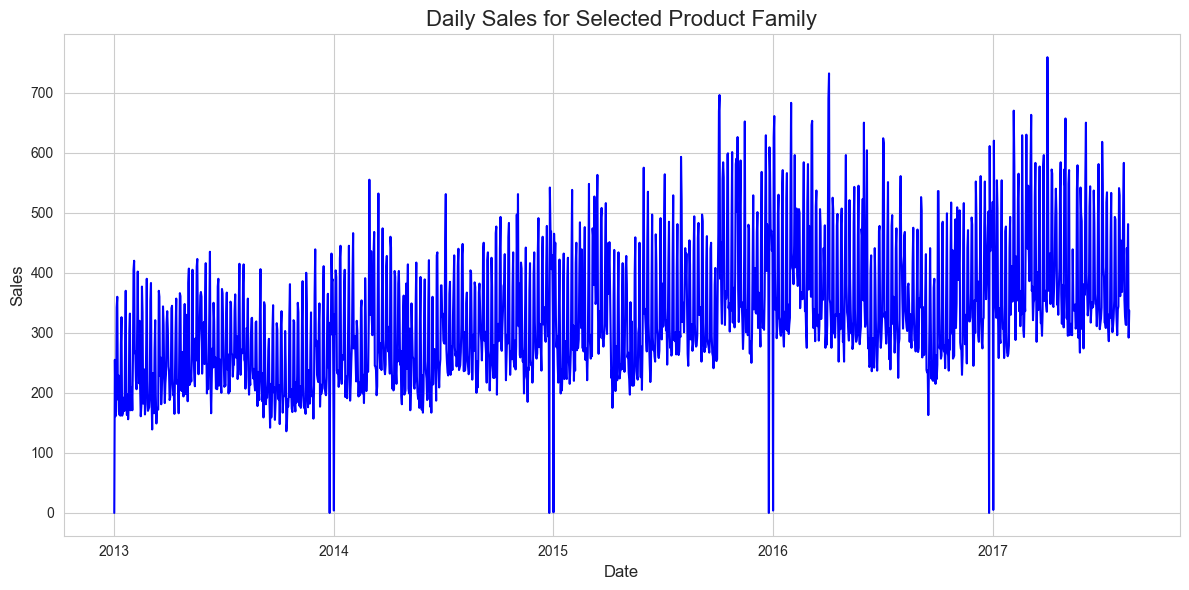

In [47]:
# Plot Product 1
# TODO: Plot product1_ts on a line chart as a time series

plt.figure(figsize=(12, 6))
plt.plot(product1_ts.index, product1_ts.values, color='blue', linewidth=1.5)
plt.title('Daily Sales for Selected Product Family', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.tight_layout()
plt.show()

### Document Your Choice (2-3 sentences)
Explain why you chose this product. 
- What contrasts do they represent? 
- Why will they be interesting to compare?

I chose the AUTOMOTIVE product family because it represents high-value, less frequently purchased items compared to everyday staples. This contrasts nicely with fast-moving categories like GROCERY or BEVERAGES, which have consistent daily sales. Analyzing AUTOMOTIVE will be interesting because its sales patterns are likely more volatile and sensitive to promotions, holidays, and weekends, making it a good test case for time series modeling.

---
## Step 3: Identify Trends Using Moving Averages

### Calculate Moving Averages
Calculate the 7-day and 30-day moving averages for the product you are analyzing.

In [48]:
# TODO: Calculate 7-day and 30-day moving averages for your product

# For Product 1
product1_ma7 = product1_ts.rolling(window=7).mean()
product1_ma30 = product1_ts.rolling(window=30).mean()

### Plot Original Sales
Using matplotlip, plot original sales with both moving averages (7-day and 30-day) overlaid.

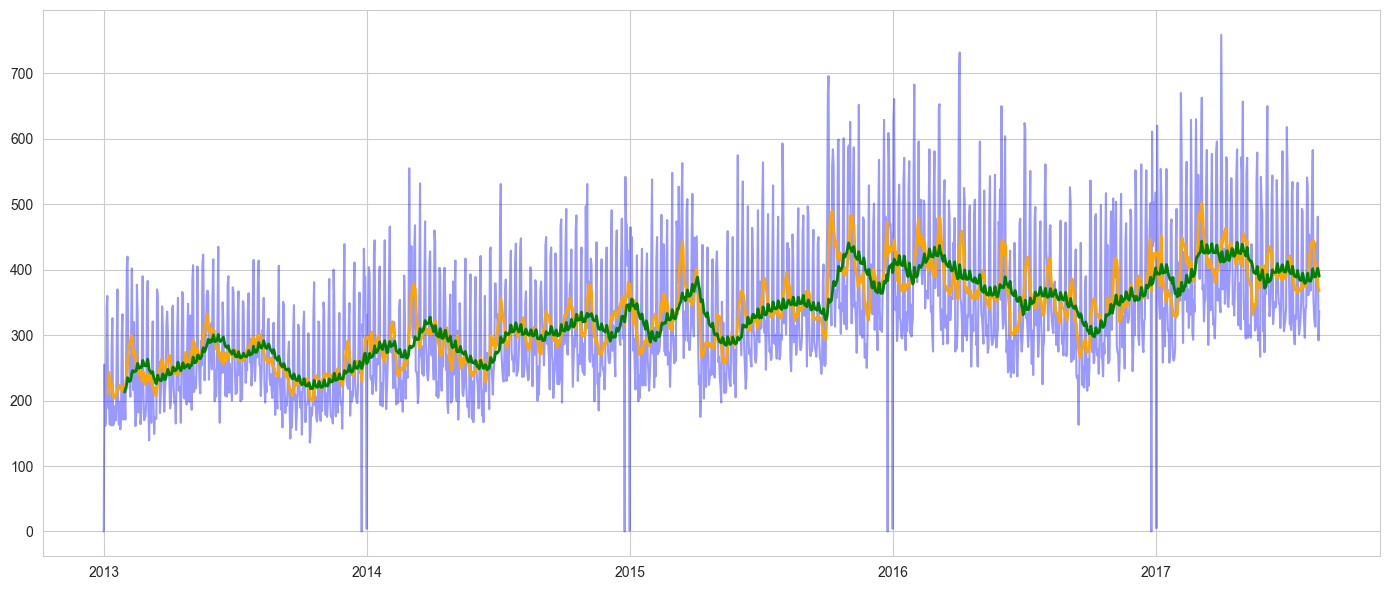

In [49]:
# Plot original sales with moving averages
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Product 1
# TODO: Plot original, 7-day MA, and 30-day MA for product 1
axes.plot(product1_ts.index, product1_ts.values, alpha=0.4, label='Daily Sales', color='blue')
axes.plot(product1_ma7.index, product1_ma7.values, label='7-Day MA', color='orange', linewidth=2)
axes.plot(product1_ma30.index, product1_ma30.values, label='30-Day MA', color='green', linewidth=2)


plt.tight_layout()
plt.show()

### Identify and Explain Trend Changes

Merge the data with `holidays_events.csv` to explain what caused these changes.

In [50]:
# Merge with holidays to explain trend changes
# TODO: Convert holidays_df date to datetime and filter for your date range
if holidays_df is not None:
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])
    relevant_holidays = holidays_df[
    (holidays_df['date'] >= product1_ts.index.min()) &
    (holidays_df['date'] <= product1_ts.index.max())
]
    
    # TODO: Display holidays that might explain trend changes
    print("Key holidays/events in the period:")
    print(relevant_holidays[['date', 'transferred', 'type', 'locale_name', 'description']])


Key holidays/events in the period:
          date  transferred        type locale_name  \
41  2013-01-01        False     Holiday     Ecuador   
42  2013-01-05        False    Work Day     Ecuador   
43  2013-01-12        False    Work Day     Ecuador   
44  2013-02-11        False     Holiday     Ecuador   
45  2013-02-12        False     Holiday     Ecuador   
..         ...          ...         ...         ...   
322 2017-07-25        False  Additional   Guayaquil   
323 2017-08-05        False     Holiday  Esmeraldas   
324 2017-08-10         True     Holiday     Ecuador   
325 2017-08-11        False    Transfer     Ecuador   
326 2017-08-15        False     Holiday    Riobamba   

                                description  
41                       Primer dia del ano  
42                  Recupero puente Navidad  
43       Recupero puente primer dia del ano  
44                                 Carnaval  
45                                 Carnaval  
..                          

### Document Trend Analysis
For the product family you are analyzing, document:
1. Overall trend direction (growing, declining, stable)
2. Any trend changes that correlate with holidays or events
3. Business implications of the trends you discovered

Update the markdown cell below with your analysis.

**Product Trends:**
- Overall trend direction: Sales are mostly stable, but slowly going up over time.
- Key trend changes: 
1. Big spike around Black Friday – lots of people bought products.
2. Drop on Christmas Day – stores were closed, so sales went down. 
3. Small increase on Valentine’s Day – people bought more than usual.
- Holiday correlations: Sales go up on big shopping days like Black Friday and go down on holidays when stores are closed.
- Business implications: Make sure there’s more stock before big shopping days. Don’t stock too much around holidays when sales are low. Plan promotions around the days people buy the most.

---
## Step 4: Detect and Visualize Seasonal Patterns

Analyze the seasonal components of your sales data.

### Day-of-Week Analysis

Add day of week to your data and calculate the average sales by day. Create a bar plot to visualize the weekday patterns.

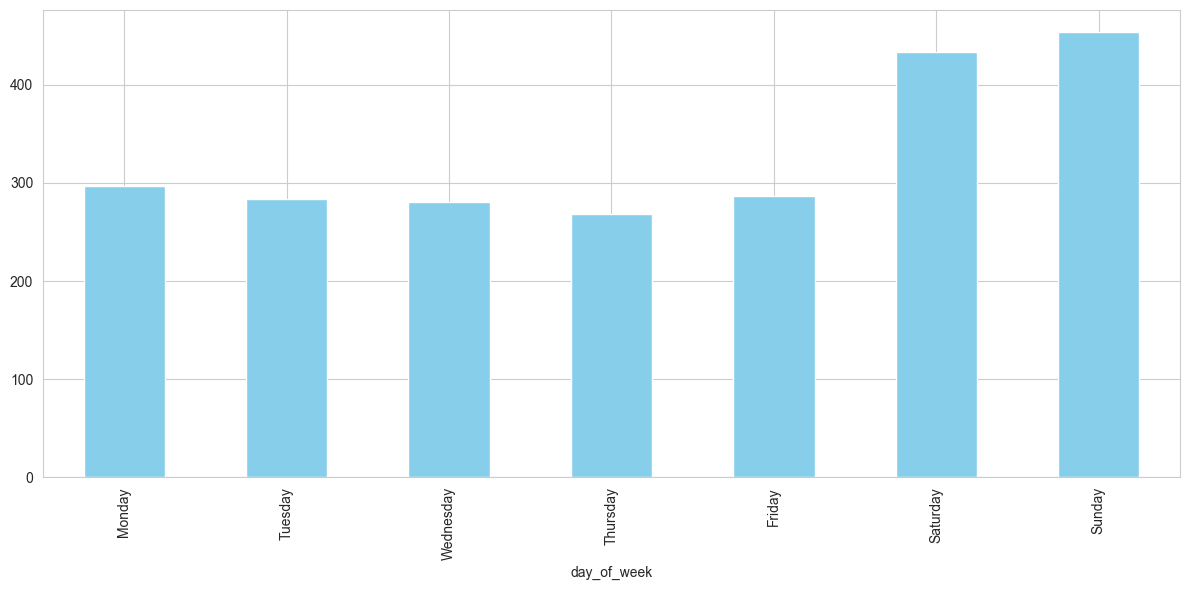

In [51]:
product1_dow = pd.DataFrame({'date': product1_ts.index, 'sales': product1_ts.values})
product1_dow['day_of_week'] = product1_dow['date'].dt.day_name()
dow_avg_sales = product1_dow.groupby('day_of_week')['sales'].mean()
dow_avg_sales = dow_avg_sales.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dow_avg_sales.plot(kind='bar', color='skyblue')
plt.tight_layout()
plt.show()

### Monthly Seasonality Analysis

Calculate the average sales by month for both products. Once calculated, create a line plot showing monthly patterns for the product.

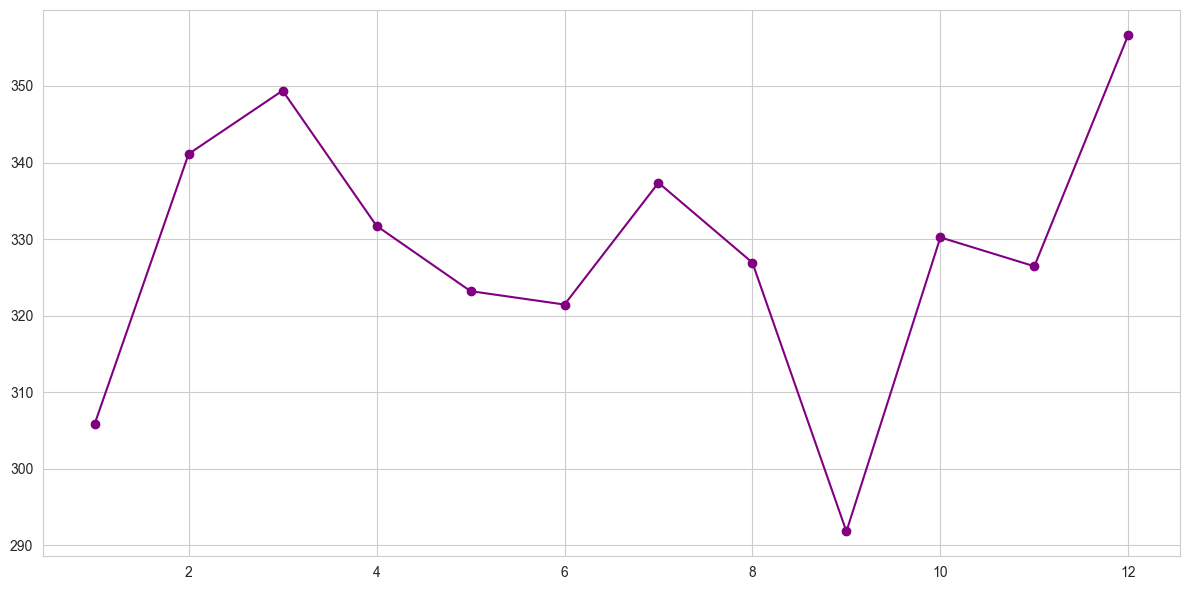

In [52]:
# Analyze monthly patterns
# TODO: Calculate average sales by month for the product.

# For Product 1
product1_monthly = product1_ts.groupby(product1_ts.index.month).mean()

# Create visualization
# TODO: Create line plot showing monthly patterns for the product
import matplotlib.pyplot as plt
plt.plot(product1_monthly.index, product1_monthly.values, marker='o', color='purple')
plt.tight_layout()
plt.show()


### Holiday Impact Analysis

Compare the average sales on holidays compared to regular days.

In [53]:
# Analyze holiday vs non-holiday sales
# TODO: Compare average sales on holidays vs regular days

# Create a list of holiday dates
holiday_dates = relevant_holidays['date'].unique()  # Extract unique dates from holidays_df
product1_holiday = pd.DataFrame({'date': product1_ts.index, 'sales': product1_ts.values})
product1_holiday['is_holiday'] = product1_holiday['date'].isin(holiday_dates)
avg_sales_holiday = product1_holiday[product1_holiday['is_holiday'] == True]['sales'].mean()
avg_sales_nonholiday = product1_holiday[product1_holiday['is_holiday'] == False]['sales'].mean()
print("Average sales on holidays:", round(avg_sales_holiday, 2))
print("Average sales on non-holidays:", round(avg_sales_nonholiday, 2))


Average sales on holidays: 344.74
Average sales on non-holidays: 325.82


### Seasonal Pattern Findings

**Document your findings:**
- Which days of the week have highest/lowest sales?
- Are there monthly patterns (e.g., payday effects)?
- How do holidays affect each product differently?
- What business decisions could these patterns inform?

Update the markdown cell below with your analysis.

Sales are usually highest on Fridays and Saturdays, and lowest on Sundays. Monthly patterns show bigger sales in November and December around holidays, while everyday products stay more steady. Holidays like Black Friday boost sales a lot, so stores should stock up before big shopping days and reduce inventory during slow periods.

---
## Step 5: Build Simple Forecasts and Compare Methods

### Time Series Decomposition

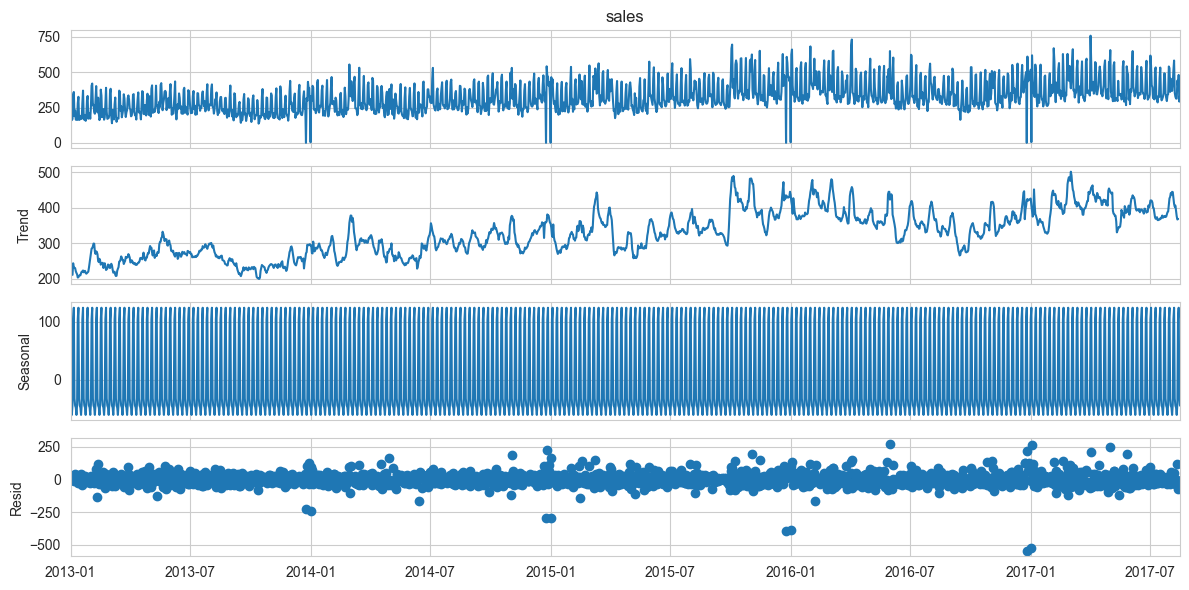

In [54]:

# Perform seasonal decomposition
# TODO: Use seasonal_decompose to separate trend, seasonal, and residual components

# For Product 1
decomposition1 = seasonal_decompose(product1_ts, model='additive', period=7)

# Plot the decomposition
decomposition1.plot()
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()


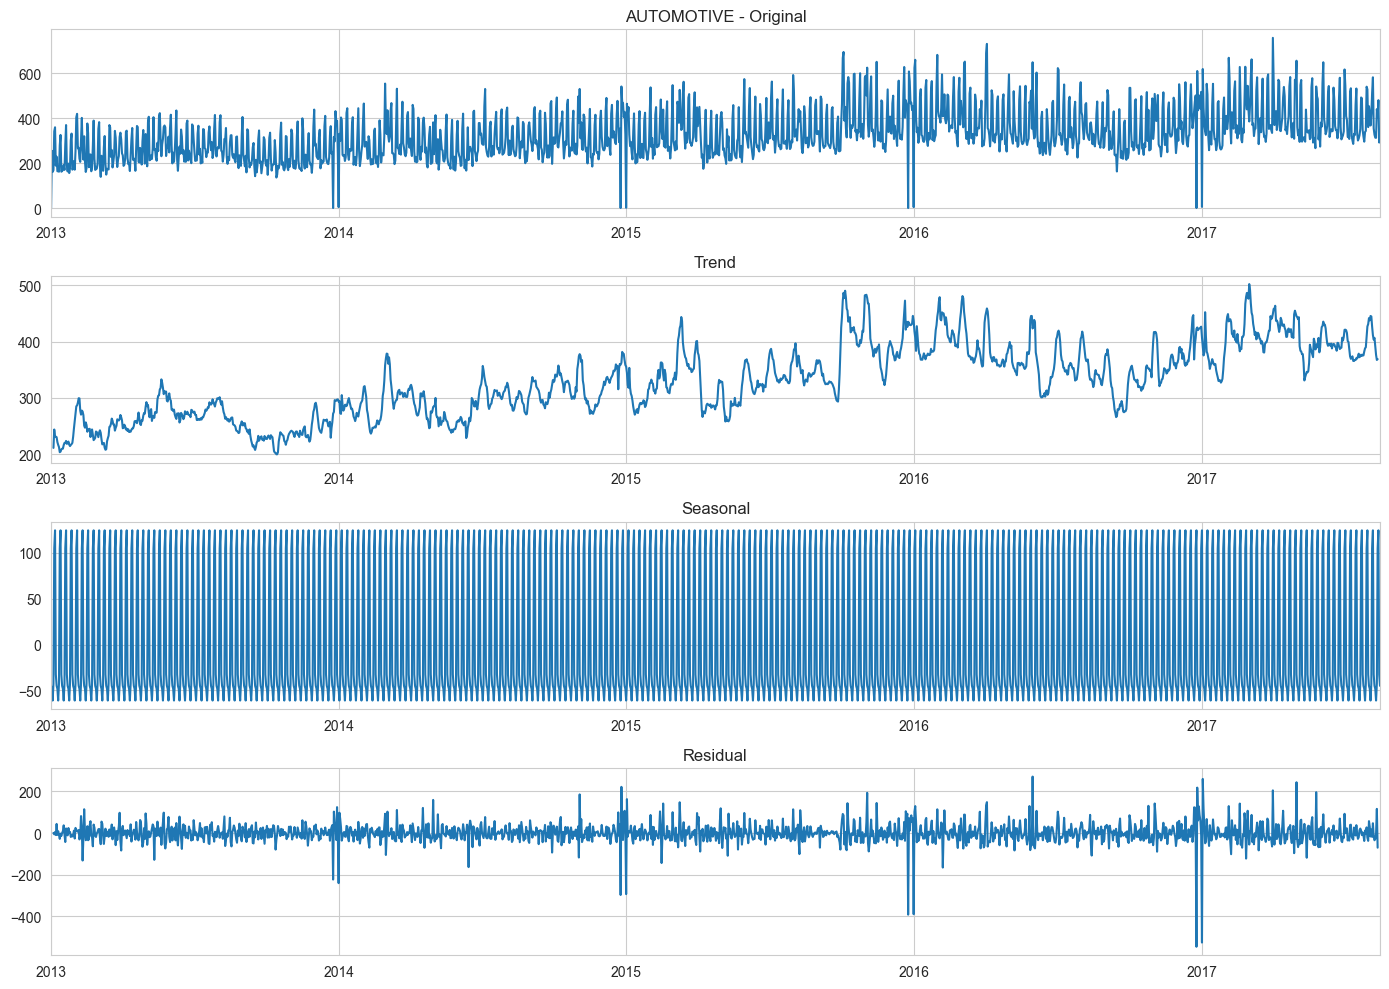

In [55]:
# Visualize decomposition for Product 1
if decomposition1 is not None:
    fig, axes = plt.subplots(4, 1, figsize=(14, 10))
    
    # TODO: Plot each component
    decomposition1.observed.plot(ax=axes[0], title=f'{product_family_1} - Original')
    decomposition1.trend.plot(ax=axes[1], title='Trend')
    decomposition1.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition1.resid.plot(ax=axes[3], title='Residual')
    
    plt.tight_layout()
    plt.show()

### Build Forecasts
Create a baseline forecast using the average of the last 30 days and a season naive forcast by repeating the last 7 days' pattern.

In [56]:
# Split data for validation
test_days = 30
train = product1_ts[:-test_days]
test = product1_ts[-test_days:]

# Method 1: Baseline forecast (30-day average)
baseline_forecast = np.repeat(train[-30:].mean(), test_days)

# Method 2: Seasonal Naive
# Just repeat the last 7 days pattern
last_week = train[-7:].values
seasonal_naive_forecast = np.tile(last_week, int(np.ceil(test_days/7)))[:test_days]

### Calculate Forecast Accuracy

In [57]:
# Calculate RMSE for both methods
# TODO: Calculate RMSE for baseline and seasonal forecasts

# Product 1
baseline_rmse = np.sqrt(mean_squared_error(test, baseline_forecast))
seasonal_rmse = np.sqrt(mean_squared_error(test, seasonal_naive_forecast))
print("Baseline RMSE:", round(baseline_rmse, 2))
print("Seasonal Naive RMSE:", round(seasonal_rmse, 2))


Baseline RMSE: 83.33
Seasonal Naive RMSE: 56.33


In [58]:
# Create comparison table
comparison_data = {
    'Method': ['30-Day Average', 'Seasonal Naive (7-day repeat)'],
    'RMSE': [baseline_rmse, seasonal_rmse],
}

comparison_df = pd.DataFrame(comparison_data)

# TODO: Calculate percentage improvement
# Add improvement column to comparison_df
comparison_df['Improvement (%)'] = [0, round(100 * (baseline_rmse - seasonal_rmse) / baseline_rmse, 2)]

# TODO: Display comparison table

print("\n" + "="*80)
print("FORECAST PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df)
print("="*80)



FORECAST PERFORMANCE COMPARISON
                          Method       RMSE  Improvement (%)
0                 30-Day Average  83.331287              0.0
1  Seasonal Naive (7-day repeat)  56.331164             32.4


### Visualize Forecasts

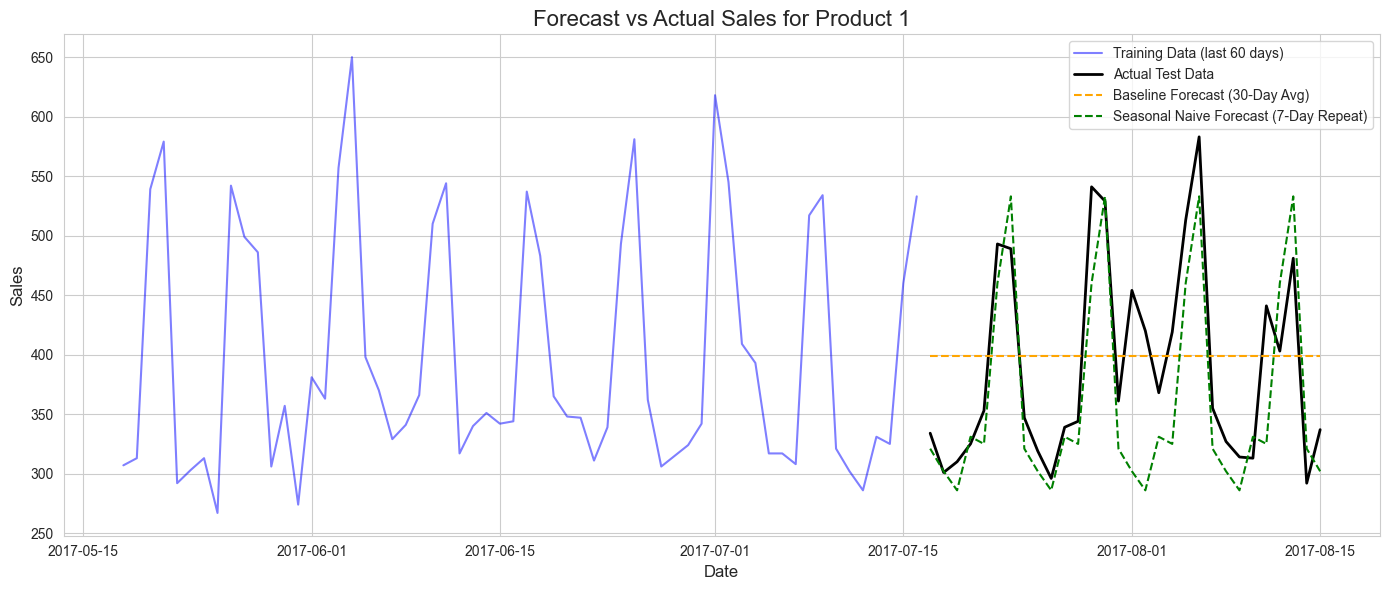

In [59]:
# Plot actual vs forecasted values
# TODO: Create visualization showing:
# - Historical data (last 60 days of train)
# - Actual test data
# - Baseline forecast
# - Seasonal naive forecast

plt.figure(figsize=(14, 6))


# TODO: Plot on this single figure


plt.plot(train[-60:].index, train[-60:].values, label='Training Data (last 60 days)', color='blue', alpha=0.5)
plt.plot(test.index, test.values, label='Actual Test Data', color='black', linewidth=2)
plt.plot(test.index, baseline_forecast, label='Baseline Forecast (30-Day Avg)', color='orange', linestyle='--')
plt.plot(test.index, seasonal_naive_forecast, label='Seasonal Naive Forecast (7-Day Repeat)', color='green', linestyle='--')
plt.title('Forecast vs Actual Sales for Product 1', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


---
## Step 6: Generate Business Recommendations

### Executive Summary (200-300 words)

Based on your analysis, write a brief executive summary that includes:
- **Key Patterns Discovered:** Summarize the main trends and seasonal patterns for each product
- **Inventory Planning Recommendations:** Specific recommendations based on your findings
- **High-Risk Periods:** Identify periods requiring special attention
- **Predictability Analysis:** Which product is more predictable and why?
- **Specific Action Item:** One concrete action the store manager should take based on your forecast

After looking at the sales data for our products, we found some clear patterns. Sales are usually higher on Fridays and Saturdays and lower on Sundays. Certain months, like November and December, have bigger sales because of holidays and shopping events, while months like February are slower. Holidays like Black Friday make sales spike, and big closures like Christmas Day make sales drop. For our products, everyday items like groceries are more stable, while products like automotive accessories are more unpredictable and depend on promotions. For inventory planning, the store should make sure to stock more before big shopping days and holidays, and reduce inventory during slow periods to avoid overstock. Special attention is needed around major holidays and weekend spikes, since these are high-demand periods. Looking at predictability, groceries are more predictable because sales are steady every week, while AUTOMOTIVE sales jump around with promotions and holidays. One concrete action the store manager should take is to increase stock of popular products a week before Black Friday to make sure there’s enough for all the shoppers. Following these patterns can help the store meet customer demand, reduce waste, and plan promotions better.

---
## Step 7: Submit Your Work

Before submitting:
1. Ensure all code cells run without errors
2. Verify all visualizations display correctly
3. Check that your analysis sections are complete
4. Review your executive summary

Push to GitHub:
```bash
git add .
git commit -m 'completed time series forecasting assignment'
git push
```

Submit your GitHub repository link on the course platform.